In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('audible.csv')

In [5]:
#Head function shows the first five records of the dataset.

data.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [53]:
#summary of the datset.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [6]:
#Cleaning author name by removing 'Writtenby'.
#I first split the author string and storing the name of the author after the colon back into the dataset.

split_col = data['author'].str.split(':', expand=True)
data['author'] = split_col[1]

In [7]:
data.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [54]:
#Finding unique languages in the dataset.

data['language'].unique()

array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', 'lithuanian'], dtype=object)

In [8]:
#Splitting narrator records with the same logic we have splitted author records.

split_col2 = data['narrator'].str.split(':', expand=True)
data['narrator'] = split_col2[1]

In [18]:
data.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [9]:
#Calculating total time in minutes.
#First i use extract function to extract both hours and minutes. 

Hours = data['time'].str.extract('(\d+) hrs?', expand=False).astype(float)
Minutes = data['time'].str.extract('(\d+) mins?', expand=False).astype(float)

In [10]:
#In this step I replace 'nan' values with 0 because earlier it was giving me wromg calculations.

Hours = Hours.replace(np.nan, 0)
Minutes = Minutes.replace(np.nan, 0)

#Calculating total minutes.
total_minutes = Hours * 60 + Minutes

#Storing total minutes in the dataset.
data['total_minutes'] = total_minutes

In [8]:
data.head()

,name,author,narrator,time,releasedate,language,stars,price,total_minutes
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00,140.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00,788.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00,123.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00,676.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00,600.0


In [11]:
#Separating rating from the stars column.

rating = data['stars'].str.split('out', expand=True)

data['rating'] = rating[0]

In [10]:
data.head()

,name,author,narrator,time,releasedate,language,stars,price,total_minutes,rating
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00,140.0,5
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00,788.0,4.5
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00,123.0,4.5
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00,676.0,4.5
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00,600.0,4.5


In [12]:
#Then separating total reviews from the column.

total_ratings = data['stars'].str.extract('(\d+) ratings?')

data['total_ratings'] = total_ratings

In [12]:
data.head()

,name,author,narrator,time,releasedate,language,stars,price,total_minutes,rating,total_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00,140.0,5,34
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00,788.0,4.5,41
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00,123.0,4.5,38
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00,676.0,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00,600.0,4.5,181


In [13]:
#Converting releasedate to 'datetime' format. 

data['releasedate'] = pd.to_datetime(data['releasedate'], format = '%d-%m-%y')

In [14]:
data.head()

,name,author,narrator,time,releasedate,language,stars,price,total_minutes,rating,total_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,2008-08-04,English,5 out of 5 stars34 ratings,468.00,140.0,5,34
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,2018-05-01,English,4.5 out of 5 stars41 ratings,820.00,788.0,4.5,41
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,2020-11-06,English,4.5 out of 5 stars38 ratings,410.00,123.0,4.5,38
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,2021-10-05,English,4.5 out of 5 stars12 ratings,615.00,676.0,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,2010-01-13,English,4.5 out of 5 stars181 ratings,820.00,600.0,4.5,181


In [14]:
#Getting year and month of all the records.

data['year'] = data['releasedate'].dt.year
data['month'] = data['releasedate'].dt.month

In [16]:
data.head()

,name,author,narrator,time,releasedate,language,stars,price,total_minutes,rating,total_ratings,year,month
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,2008-08-04,English,5 out of 5 stars34 ratings,468.00,140.0,5,34,2008,8
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,2018-05-01,English,4.5 out of 5 stars41 ratings,820.00,788.0,4.5,41,2018,5
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,2020-11-06,English,4.5 out of 5 stars38 ratings,410.00,123.0,4.5,38,2020,11
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,2021-10-05,English,4.5 out of 5 stars12 ratings,615.00,676.0,4.5,12,2021,10
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,2010-01-13,English,4.5 out of 5 stars181 ratings,820.00,600.0,4.5,181,2010,1


In [15]:
#Dropping columns which I think they will be not of use.

data = data.drop(['time','stars'], axis=1)

In [18]:
data.head()

,name,author,narrator,releasedate,language,price,total_minutes,rating,total_ratings,year,month
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2008-08-04,English,468.00,140.0,5,34,2008,8
1,The Burning Maze,RickRiordan,RobbieDaymond,2018-05-01,English,820.00,788.0,4.5,41,2018,5
2,The Deep End,JeffKinney,DanRussell,2020-11-06,English,410.00,123.0,4.5,38,2020,11
3,Daughter of the Deep,RickRiordan,SoneelaNankani,2021-10-05,English,615.00,676.0,4.5,12,2021,10
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,2010-01-13,English,820.00,600.0,4.5,181,2010,1


In [16]:
#Replacing 'free' value in price to 0. 

data['price'] = data['price'].str.replace('Free', '0')

In [17]:
#Then converting values of price which are in string.

data['price'] = data['price'].str.replace(',','').astype('float')

In [17]:
#Getting values in price column

data['price'].describe()

count    87489.000000
mean       559.009246
std        336.096642
min          0.000000
25%        268.000000
50%        585.000000
75%        755.000000
max       7198.000000
Name: price, dtype: float64

In [18]:
#Converting all the integer values of rating to floating point.

data['rating'] = data['rating'].replace('Not rated yet', 0.0)
data['rating'] = data['rating'].astype(float)
data.head()

,name,author,narrator,releasedate,language,price,total_minutes,rating,total_ratings,year,month
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2008-08-04,English,468.0,140.0,5.0,34,2008,8
1,The Burning Maze,RickRiordan,RobbieDaymond,2018-05-01,English,820.0,788.0,4.5,41,2018,5
2,The Deep End,JeffKinney,DanRussell,2020-11-06,English,410.0,123.0,4.5,38,2020,11
3,Daughter of the Deep,RickRiordan,SoneelaNankani,2021-10-05,English,615.0,676.0,4.5,12,2021,10
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,2010-01-13,English,820.0,600.0,4.5,181,2010,1


In [19]:
#Creating a new column based on the rating category.

length = len(data)
rating_list = []

for x in range(0, length):
    category = data['rating'][x]
    if category == 5.0:
        rates = 'Excellent'
    elif category >= 3.0 and category < 5.0:
        rates = 'Good'
    else:
        rates='Bad'
    rating_list.append(rates)

rating_category = pd.Series(rating_list)
data['rating_category'] = rating_category

In [34]:
data.head()

,name,author,narrator,releasedate,language,price,total_minutes,rating,total_ratings,year,month,rating_category
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2008-08-04,English,468.0,140.0,5.0,34,2008,8,Excellent
1,The Burning Maze,RickRiordan,RobbieDaymond,2018-05-01,English,820.0,788.0,4.5,41,2018,5,Good
2,The Deep End,JeffKinney,DanRussell,2020-11-06,English,410.0,123.0,4.5,38,2020,11,Good
3,Daughter of the Deep,RickRiordan,SoneelaNankani,2021-10-05,English,615.0,676.0,4.5,12,2021,10,Good
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,2010-01-13,English,820.0,600.0,4.5,181,2010,1,Good


In [20]:
data['total_ratings'] = data['total_ratings'].replace(np.nan, 0)

In [51]:
data.head()

,name,author,narrator,releasedate,language,price,total_minutes,rating,total_ratings,year,month,rating_category
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2008-08-04,English,468.0,140.0,5.0,34,2008,8,Excellent
1,The Burning Maze,RickRiordan,RobbieDaymond,2018-05-01,English,820.0,788.0,4.5,41,2018,5,Good
2,The Deep End,JeffKinney,DanRussell,2020-11-06,English,410.0,123.0,4.5,38,2020,11,Good
3,Daughter of the Deep,RickRiordan,SoneelaNankani,2021-10-05,English,615.0,676.0,4.5,12,2021,10,Good
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,2010-01-13,English,820.0,600.0,4.5,181,2010,1,Good


In [54]:
#saving all processes to a new file.

data.to_csv('audible_cleaned.csv', index=True)

Text(0.5, 1.0, 'Monthly Distribution of Book Releases')

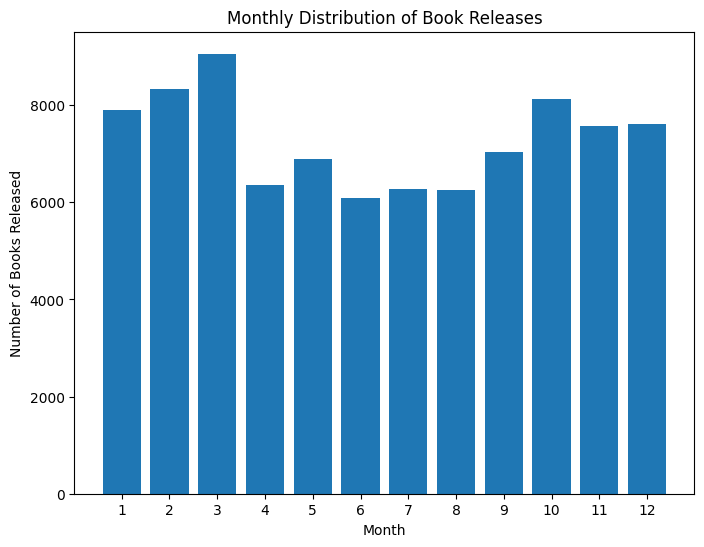

In [30]:
# Ques. Which month have the highest number of book releases?

monthly_counts = data.groupby('month')['name'].count()
# monthly_counts

plt.figure(figsize=(8,6))
plt.bar(monthly_counts.index, monthly_counts.values)
plt.xticks(range(1, 13))

plt.xlabel('Month')
plt.ylabel('Number of Books Released')
plt.title('Monthly Distribution of Book Releases')

Text(0, 0.5, 'Total Minutes')

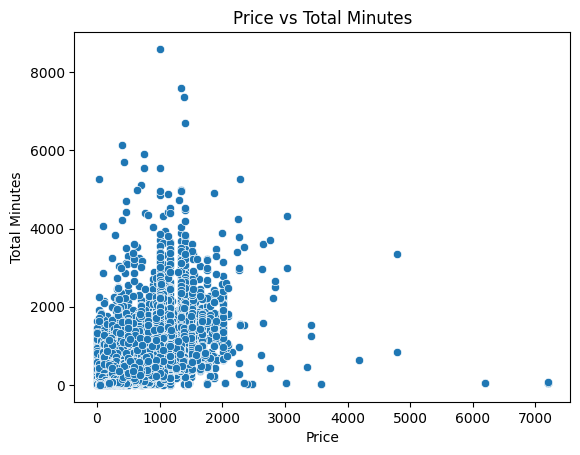

In [22]:
#Ques. Does the length of a book (in total minutes) have any impact on its pricing?

sns.scatterplot(data=data, x='price', y='total_minutes')

plt.title("Price vs Total Minutes")
plt.xlabel("Price")
plt.ylabel("Total Minutes")

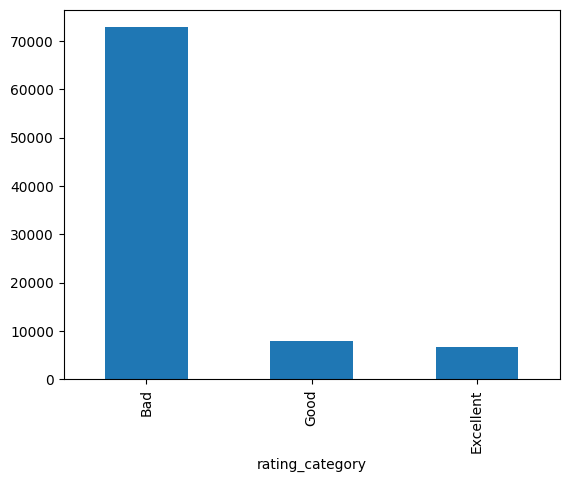

In [40]:
#Ques. What is the distribution of ratings for each rating category?

rate_graph = data['rating_category'].value_counts()

rate_graph.plot.bar()
plt.show()

Text(0.5, 1.0, 'Total Ratings of Audiobooks Over Time')

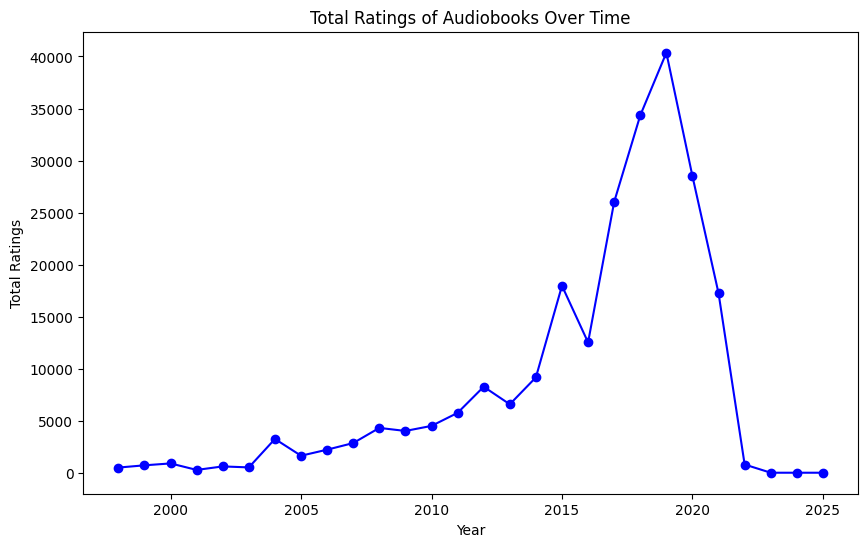

In [80]:
#Ques. What are the total ratings of audiobooks over different years?

data['total_ratings'] = data['total_ratings'].astype(int)

yearly_ratings = data.groupby('year')['total_ratings'].sum()

plt.figure(figsize=(10, 6))
plt.plot(yearly_ratings.index, yearly_ratings.values, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Total Ratings')
plt.title('Total Ratings of Audiobooks Over Time')